In [1]:
# Importar las librerías necesarias
import tensorflow as tf
import numpy as np
from tensorflow import keras
#import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
#from keras.models import Sequential
#from keras.layers import Dense
#from keras.callbacks import EarlyStopping


from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [2]:
from Limpiezadatos import df_sin_nulos

c:\Users\jpcan\OneDrive\Documentos\Andes Universidad\Analitica computacional\Proyecto_final_github\Limpiezadatos.py:23: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query(query, engine)
c:\Users\jpcan\OneDrive\Documentos\Andes Universidad\Analitica computacional\Proyecto_final_github\Limpiezadatos.py:56: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sin_nulos.drop(columns=columnas_a_eliminar, inplace=True)
c:\Users\jpcan\OneDrive\Documentos\Andes Universidad\Analitica computacional\Proyecto_final_github\Limpiezadatos.py:61: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .lo

In [4]:
# Ver el nombre de las columnas
columnas = df_sin_nulos.columns

print(columnas)


Index(['periodo', 'cole_area_ubicacion', 'cole_bilingue', 'cole_calendario',
       'cole_caracter', 'cole_genero', 'cole_jornada', 'cole_mcpio_ubicacion',
       'cole_naturaleza', 'cole_nombre_establecimiento', 'cole_nombre_sede',
       'cole_sede_principal', 'estu_depto_presentacion', 'estu_depto_reside',
       'estu_estadoinvestigacion', 'estu_genero', 'estu_mcpio_presentacion',
       'estu_mcpio_reside', 'estu_nacionalidad', 'estu_pais_reside',
       'fami_cuartoshogar', 'fami_educacionmadre', 'fami_educacionpadre',
       'fami_estratovivienda', 'fami_personashogar', 'fami_tieneautomovil',
       'fami_tienecomputador', 'fami_tieneinternet', 'fami_tienelavadora',
       'punt_ingles', 'punt_matematicas', 'punt_sociales_ciudadanas',
       'punt_c_naturales', 'punt_lectura_critica', 'edad'],
      dtype='object')


In [5]:
import pandas as pd
import numpy as np



# Dividir en X e Y
Y = df_sin_nulos['punt_ingles']
columnas_a_excluir = ['punt_ingles','punt_matematicas', 'punt_sociales_ciudadanas', 'punt_c_naturales', 'punt_lectura_critica','cole_mcpio_ubicacion','cole_nombre_sede','periodo']
#'punt_matematicas', 'punt_sociales_ciudadanas', 'punt_c_naturales', 'punt_lectura_critica'
X = df_sin_nulos.drop(columns=columnas_a_excluir, axis=1)
# Convertir las columnas categóricas en variables dummy
X_dummies = pd.get_dummies(X)
X_dummies = X_dummies.astype(int)
print(X_dummies.shape)
print(Y.shape)

# Convertir a arrays de numpy
X_dummies = np.array(X_dummies)
Y = np.array(Y)

print(X_dummies)
print(Y)


X_dummies = X_dummies[:30000]
Y = Y[:30000]



print(X_dummies)
print(Y)

(130712, 1311)
(130712,)
[[18  0  1 ...  1  0  1]
 [18  0  1 ...  1  0  1]
 [16  0  1 ...  1  0  1]
 ...
 [18  0  1 ...  1  0  1]
 [16  0  1 ...  1  0  1]
 [16  0  1 ...  1  0  1]]
[81 83 86 ... 55 84 84]
[[18  0  1 ...  1  0  1]
 [18  0  1 ...  1  0  1]
 [16  0  1 ...  1  0  1]
 ...
 [17  0  1 ...  1  0  1]
 [20  0  1 ...  0  0  1]
 [20  0  1 ...  0  0  1]]
[81 83 86 ... 45 55 55]


In [6]:
print(X_dummies.shape)
print(Y.shape)

(30000, 1311)
(30000,)


In [7]:
X_train_full, X_test, y_train_full, y_test = train_test_split(
    X_dummies, Y, test_size=0.3, random_state=42)
X_train, X_valid, y_train, y_valid = train_test_split(
    X_train_full, y_train_full, test_size=0.3, random_state=42)

# Escalar los datos (opcional, pero es común en redes neuronales)
std_scl = StandardScaler()
std_scl.fit(X_train)

print(X_train[0:3,])
X_train = std_scl.transform(X_train)
print(X_train[0:3,])
X_valid = std_scl.transform(X_valid)
X_test = std_scl.transform(X_test)

[[17  0  1 ...  1  0  1]
 [19  0  1 ...  1  1  0]
 [16  0  1 ...  0  0  1]]
[[-0.18332631 -0.08522476  0.08522476 ...  0.34171142 -0.28815359
   0.28815359]
 [ 0.35874284 -0.08522476  0.08522476 ...  0.34171142  3.47037149
  -3.47037149]
 [-0.45436089 -0.08522476  0.08522476 ... -2.92644595 -0.28815359
   0.28815359]]


In [8]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.losses import MeanSquaredError  # Cambio en la función de pérdida
from sklearn.model_selection import train_test_split
import itertools

tf.keras.backend.clear_session()

# Definir los datos de entrenamiento y validación (X_train, X_valid, y_train, y_valid)
# Supongamos que ya están definidos

# Definir la configuración de hiperparámetros a explorar
hidden_layers = [1, 2, 3]  # Cantidad de capas ocultas
neurons_per_layer = [200, 128, 500]  # Número de neuronas por capa

# Inicializar un diccionario para almacenar los resultados
results = {}

# Iterar sobre las combinaciones de hiperparámetros
for num_layers, num_neurons in itertools.product(hidden_layers, neurons_per_layer):
    # Crear modelo
    model = Sequential()
    model.add(Dense(num_neurons, input_shape=(X_train.shape[1],), activation="relu"))
    for _ in range(num_layers - 1):
        model.add(Dense(num_neurons, activation="relu"))
    model.add(tf.keras.layers.Dropout(0.3))
    model.add(Dense(1, activation='softplus'))

    # Compilar modelo
    model.compile(loss=MeanSquaredError(),  
                  optimizer="adam",
                  metrics=["mean_absolute_error"]) 

    # Entrenar modelo
    history = model.fit(X_train, y_train, epochs=10,
                        validation_data=(X_valid, y_valid),
                        verbose=0)

    # Evaluar modelo en datos de validación
    val_loss, val_mae = model.evaluate(X_valid, y_valid, verbose=0)

    # Almacenar los resultados en el diccionario
    results[(num_layers, num_neurons)] = {'loss': val_loss, 'mean_absolute_error': val_mae, 'model': model}

# Encontrar la mejor configuración
best_configuration = min(results, key=lambda x: results[x]['loss'])
best_model = results[best_configuration]['model']

print("Mejor configuración:")
print("Número de capas ocultas:", best_configuration[0])
print("Número de neuronas por capa:", best_configuration[1])
print("Loss:", results[best_configuration]['loss'])
print("Mean Absolute Error:", results[best_configuration]['mean_absolute_error'])

# Serializar el mejor modelo a un archivo .keras
best_model.save('C:/Users/jpcan/OneDrive/Documentos/Andes Universidad/Analitica computacional/Proyecto_final_entregables/Modelos/Mejor_modelo_Ingles.keras')





Mejor configuración:
Número de capas ocultas: 1
Número de neuronas por capa: 500
Loss: 85.2227554321289
Mean Absolute Error: 7.1201581954956055


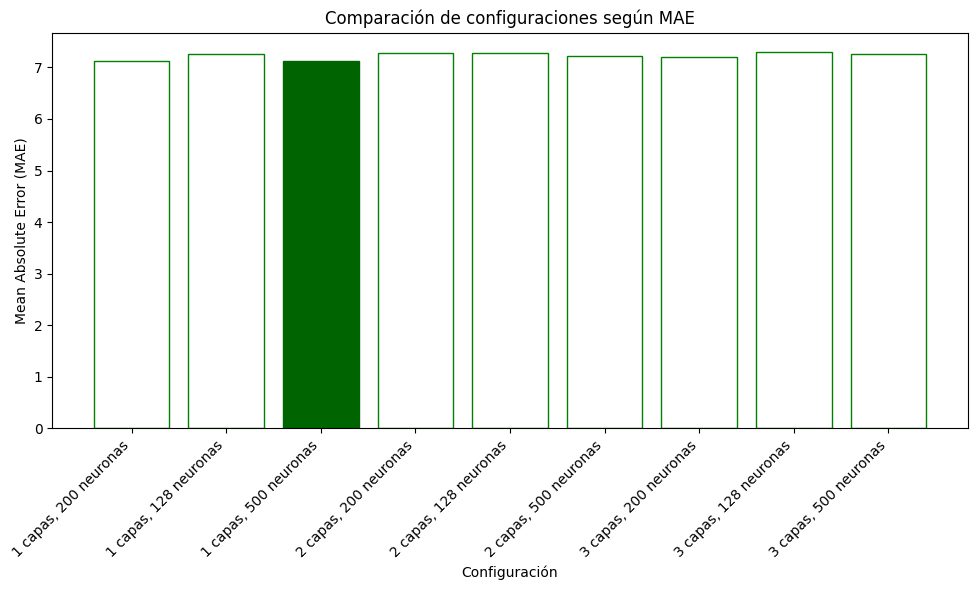

In [9]:
import matplotlib.pyplot as plt
# Preparar los datos para el gráfico de barras
configurations = list(results.keys())
mae_values = [results[config]['mean_absolute_error'] for config in configurations]
x_ticks = [f'{config[0]} capas, {config[1]} neuronas' for config in configurations]

# Crear el gráfico de barras
plt.figure(figsize=(10, 6))
bars = plt.bar(x_ticks, mae_values, color='white', edgecolor='green')

# Resaltar la mejor combinación en verde oscuro
best_index = configurations.index(best_configuration)
bars[best_index].set_color('darkgreen')

# Añadir etiquetas y título
plt.xlabel('Configuración')
plt.ylabel('Mean Absolute Error (MAE)')
plt.title('Comparación de configuraciones según MAE')

# Rotar etiquetas del eje x para mejor visualización
plt.xticks(rotation=45, ha='right', fontsize=10)

# Mostrar el gráfico
plt.tight_layout()
plt.show()

In [5]:
tf.random.set_seed(42)
tf.keras.backend.clear_session()

model = tf.keras.Sequential()
model.add(tf.keras.layers.InputLayer(input_shape=(1311,)))
model.add(tf.keras.layers.Dense(500, activation="relu"))
model.add(tf.keras.layers.Dropout(0.3))  # Agregar Dropout con probabilidad de 0.3
model.add(tf.keras.layers.Dense(1, activation='softplus'))

model.summary()





Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 500)               656000    
                                                                 
 dropout (Dropout)           (None, 500)               0         
                                                                 
 dense_1 (Dense)             (None, 1)                 501       
                                                                 
Total params: 656501 (2.50 MB)
Trainable params: 656501 (2.50 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [7]:
from tensorflow.keras.losses import MeanSquaredError
model.compile(loss=MeanSquaredError(),  
                  optimizer="adam",
                  metrics=["mean_absolute_error"])

history = model.fit(X_train, y_train, epochs=20,
                    validation_data=(X_valid, y_valid))


Epoch 1/20


460/460 [==============================] - 12s 18ms/step - loss: 541.0735 - mean_absolute_error: 16.1196 - val_loss: 111.5847 - val_mean_absolute_error: 8.0277
Epoch 2/20
460/460 [==============================] - 8s 17ms/step - loss: 103.1453 - mean_absolute_error: 7.7805 - val_loss: 96.6818 - val_mean_absolute_error: 7.5762
Epoch 3/20
460/460 [==============================] - 8s 17ms/step - loss: 91.0515 - mean_absolute_error: 7.4602 - val_loss: 92.8291 - val_mean_absolute_error: 7.4643
Epoch 4/20
460/460 [==============================] - 8s 16ms/step - loss: 86.5330 - mean_absolute_error: 7.3074 - val_loss: 92.5072 - val_mean_absolute_error: 7.4665
Epoch 5/20
460/460 [==============================] - 7s 16ms/step - loss: 83.5564 - mean_absolute_error: 7.1625 - val_loss: 91.1482 - val_mean_absolute_error: 7.3862
Epoch 6/20
460/460 [==============================] - 7s 16ms/step - loss: 80.1179 - mean_absolute_error: 7.0314 - val_loss: 88.8049 - val_mean_absolute_erro

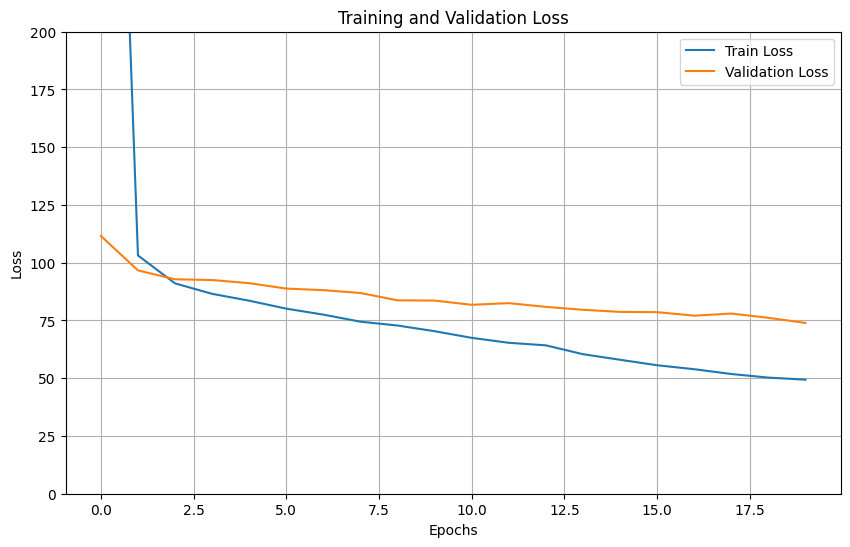

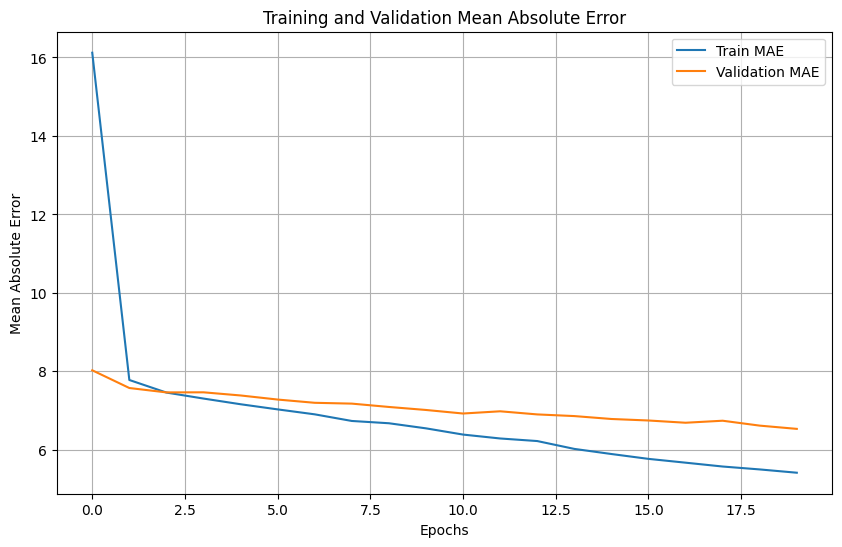

In [8]:
import matplotlib.pyplot as plt

# Graficar pérdida en entrenamiento y validación
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.ylim(0, 200)  # Establecer los límites del eje y entre 0 y 100
plt.legend()
plt.grid(True)
plt.show()


# Graficar Mean Absolute Error en entrenamiento y validación
plt.figure(figsize=(10, 6))
plt.plot(history.history['mean_absolute_error'], label='Train MAE')
plt.plot(history.history['val_mean_absolute_error'], label='Validation MAE')
plt.title('Training and Validation Mean Absolute Error')
plt.xlabel('Epochs')
plt.ylabel('Mean Absolute Error')
plt.legend()
plt.grid(True)
plt.show()
